In [1]:
import cv2
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import colorsys
import numpy as np
import random

2024-07-12 11:20:15.843837: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-12 11:20:15.857958: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 11:20:15.873031: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 11:20:15.873065: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-12 11:20:15.885126: I tensorflow/core/platform/cpu_feature_gua

In [7]:
MODEL_FILE = "checkpoints/model_vgg_segnet.01_combined.keras"
TEST_DIRECTORY = "_data/combined/test"
IMAGE_SIZE = (416, 608)
COLOR_MASK_ALPHA = .3

In [3]:
model = keras.models.load_model(MODEL_FILE, compile=False)

2024-07-12 11:20:17.741501: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46866 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:06:00.0, compute capability: 8.6


In [8]:
files = os.listdir(TEST_DIRECTORY)
random.shuffle(files)

In [9]:
x = keras.utils.image_dataset_from_directory(TEST_DIRECTORY,
                                                 batch_size=1,
                                                 image_size=IMAGE_SIZE,
                                                 crop_to_aspect_ratio=True,
                                                 labels=None).map(lambda x0: x0)

Found 4 files.


(416, 608, 3)


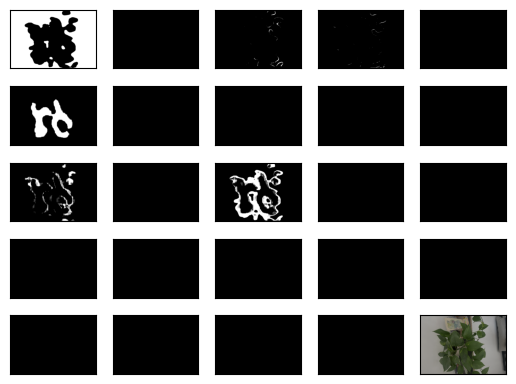

In [14]:
for image in x:
    #fig, axes = plt.subplot(2, 2)
    np_image = image.numpy().squeeze()
    print(np_image.shape)

    # output should have the shape (473, 473, 25)
    model_output = model(image, training=False).numpy().squeeze()
    n_classes = model_output.shape[2]
    model_output = model_output.argmax(axis=2)
    
    
    overlayed = np_image.copy()
    overlay = np_image.copy()
    
    fig = plt.figure()
    mask_axes = fig.subplots(5, 5)
    plt.setp(mask_axes, xticks=[], yticks=[])
    
    for ax, i in zip(mask_axes.flatten(), range(n_classes)):
        class_mask = model_output[:, :] == i
        #color = [int(round(i * 255)) for i in colorsys.hsv_to_rgb(i / model_output.shape[2], 1, 1)]
        color = colorsys.hsv_to_rgb(i / n_classes, 1, 1)
        overlay[class_mask == 1] = color
        ax.imshow(class_mask, cmap='gray', vmin=0, vmax=1)
        
    overlayed = cv2.addWeighted(overlay, COLOR_MASK_ALPHA, overlayed, 1 - COLOR_MASK_ALPHA, 0)
    cv2.imwrite("out/vis.jpg", overlayed)
    fig.show()
    plt.imshow(overlayed)
    plt.show()
    
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[ 0  2  3  5  8 10 12]


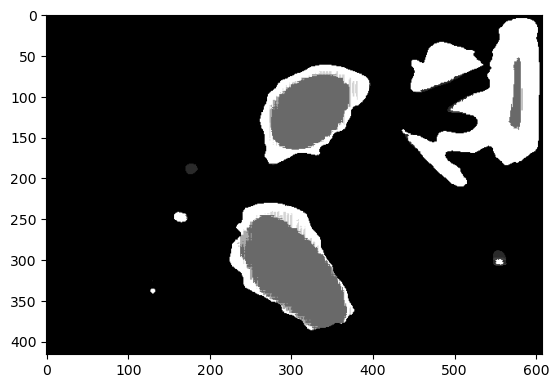

In [31]:
for image in x:
    #fig, axes = plt.subplot(2, 2)
    np_image = image.numpy().squeeze()

    # output should have the shape (473, 473, 25)
    model_output = model.predict(image).squeeze()
    n_classes = model_output.shape[2]
    model_output = model_output.argmax(axis=2)
    
    print(np.unique(model_output))
    
    plt.imshow(model_output * 25, cmap='gray')
    plt.show()
    
    break